In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math, ast
import plotly.express as px
pd.set_option('display.max_columns', None)

In [65]:
df = pd.read_csv('../Dataset/target.csv')
#df = pd.concat([df, pd.read_csv('../Dataset/glauco.csv')], axis=0)
#df = pd.concat([df, pd.read_csv('../Dataset/pasta.csv')], axis=0)

df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   data     766 non-null    object
 1   alcohol  766 non-null    object
dtypes: object(2)
memory usage: 12.1+ KB


,data,alcohol
0,"[23534, 24013, 26216, 26172, 26108, 25037, 240...",False
1,"[23797, 24164, 26134, 26143, 26142, 26120, 253...",False
2,"[23899, 24905, 26249, 26359, 26335, 26225, 254...",False
3,"[23967, 24384, 26285, 26237, 26228, 26188, 261...",False
4,"[23859, 24287, 26269, 26188, 26115, 25477, 245...",False
...,...,...
761,"[24768, 25057, 22293, 20608, 17175, 15517, 144...",True
762,"[20308, 21162, 20084, 16568, 15338, 14781, 145...",True
763,"[23601, 24128, 22837, 22948, 20774, 18260, 173...",True
764,"[23296,23890,24333,21220,18726,17577,17018,167...",True


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   data     766 non-null    object
 1   alcohol  766 non-null    object
dtypes: object(2)
memory usage: 12.1+ KB


# VISUALIZAÇÃO DOS DADOS

In [67]:
df.describe()

,data,alcohol
count,766,766
unique,758,6
top,"[14736,16107,20573,20583,20539,20323,20389,203...",True
freq,2,254


In [68]:
df['alcohol'] = df.alcohol.apply(ast.literal_eval)
df['data']    = df.data.apply(ast.literal_eval)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   data     766 non-null    object
 1   alcohol  766 non-null    bool  
dtypes: bool(1), object(1)
memory usage: 6.9+ KB


,data,alcohol
0,"[23534, 24013, 26216, 26172, 26108, 25037, 240...",False
1,"[23797, 24164, 26134, 26143, 26142, 26120, 253...",False
2,"[23899, 24905, 26249, 26359, 26335, 26225, 254...",False
3,"[23967, 24384, 26285, 26237, 26228, 26188, 261...",False
4,"[23859, 24287, 26269, 26188, 26115, 25477, 245...",False
...,...,...
761,"[24768, 25057, 22293, 20608, 17175, 15517, 144...",True
762,"[20308, 21162, 20084, 16568, 15338, 14781, 145...",True
763,"[23601, 24128, 22837, 22948, 20774, 18260, 173...",True
764,"[23296, 23890, 24333, 21220, 18726, 17577, 170...",True


### VALORES ÚNICOS

In [69]:
def showUnique(df):
    w = max(len(c) for c in df.columns)  # largura do maior nome de coluna

    for col in df.columns:
        try:
            unique = df[col].unique().tolist()
            N      = len(unique)
            exemplo = ', '.join(map(str, unique[:10]))
            print(f'{col:<{w}}  [{exemplo}{f" ... +{len(unique)}" if N > 10 else ""}]')
        except Exception as error:
            print(error)    

showUnique(df)

unhashable type: 'list'
alcohol  [False, True]


- Variável Alvo, verificação de desbalanceamento

In [70]:
TARGET = 'alcohol'

for label in df[TARGET].unique():
    total = (df[TARGET] == label).sum()
    print(f'classe {label}: {(total)} ({total/len(df)*100:.2f}%)')

classe False: 378 (49.35%)
classe True: 388 (50.65%)


### COLUNAS INVÁLIDAS

In [71]:
nan_rows = df[df.isna().any(axis=1)]
print(len(nan_rows), 'colunas NaN')
nan_rows

0 colunas NaN


,data,alcohol


### LINHAS INVÁLIDAS

In [72]:
nan_columns = df.columns[df.isna().any()].tolist()

for column in nan_columns:
    N = df[column].isna().sum()
    print(f'"{column}": {N} NaN rows ({N/len(df)*100:.2f}%)')

# VERIFICAÇÃO DE INTEGRIDADE

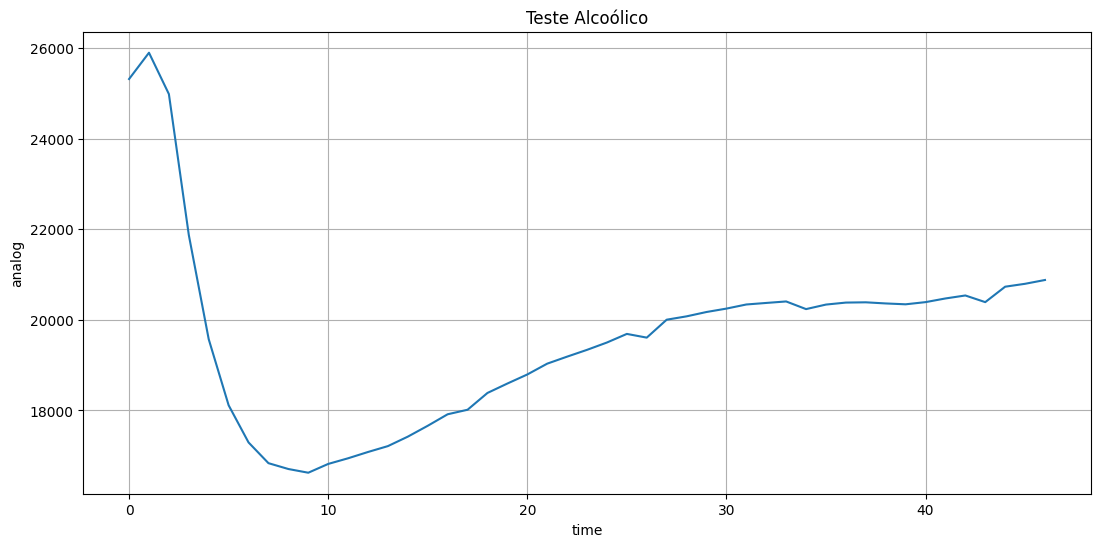

In [73]:
def plotAlcohol(data, alcohol):
    plt.plot(data)
    plt.title(f'Teste {"Alcoólico" if alcohol else "Não Alcoólico"}')
    plt.grid(), plt.xlabel('time'), plt.ylabel('analog');


plt.figure(figsize=(13, 6))
index = -1
plotAlcohol(df.iloc[index].data, df.iloc[index].alcohol)

In [74]:
sum([len(data) == 47 for data in df.data]) == len(df)

True

# VISUALIZAÇÃO MÚLTIPLA

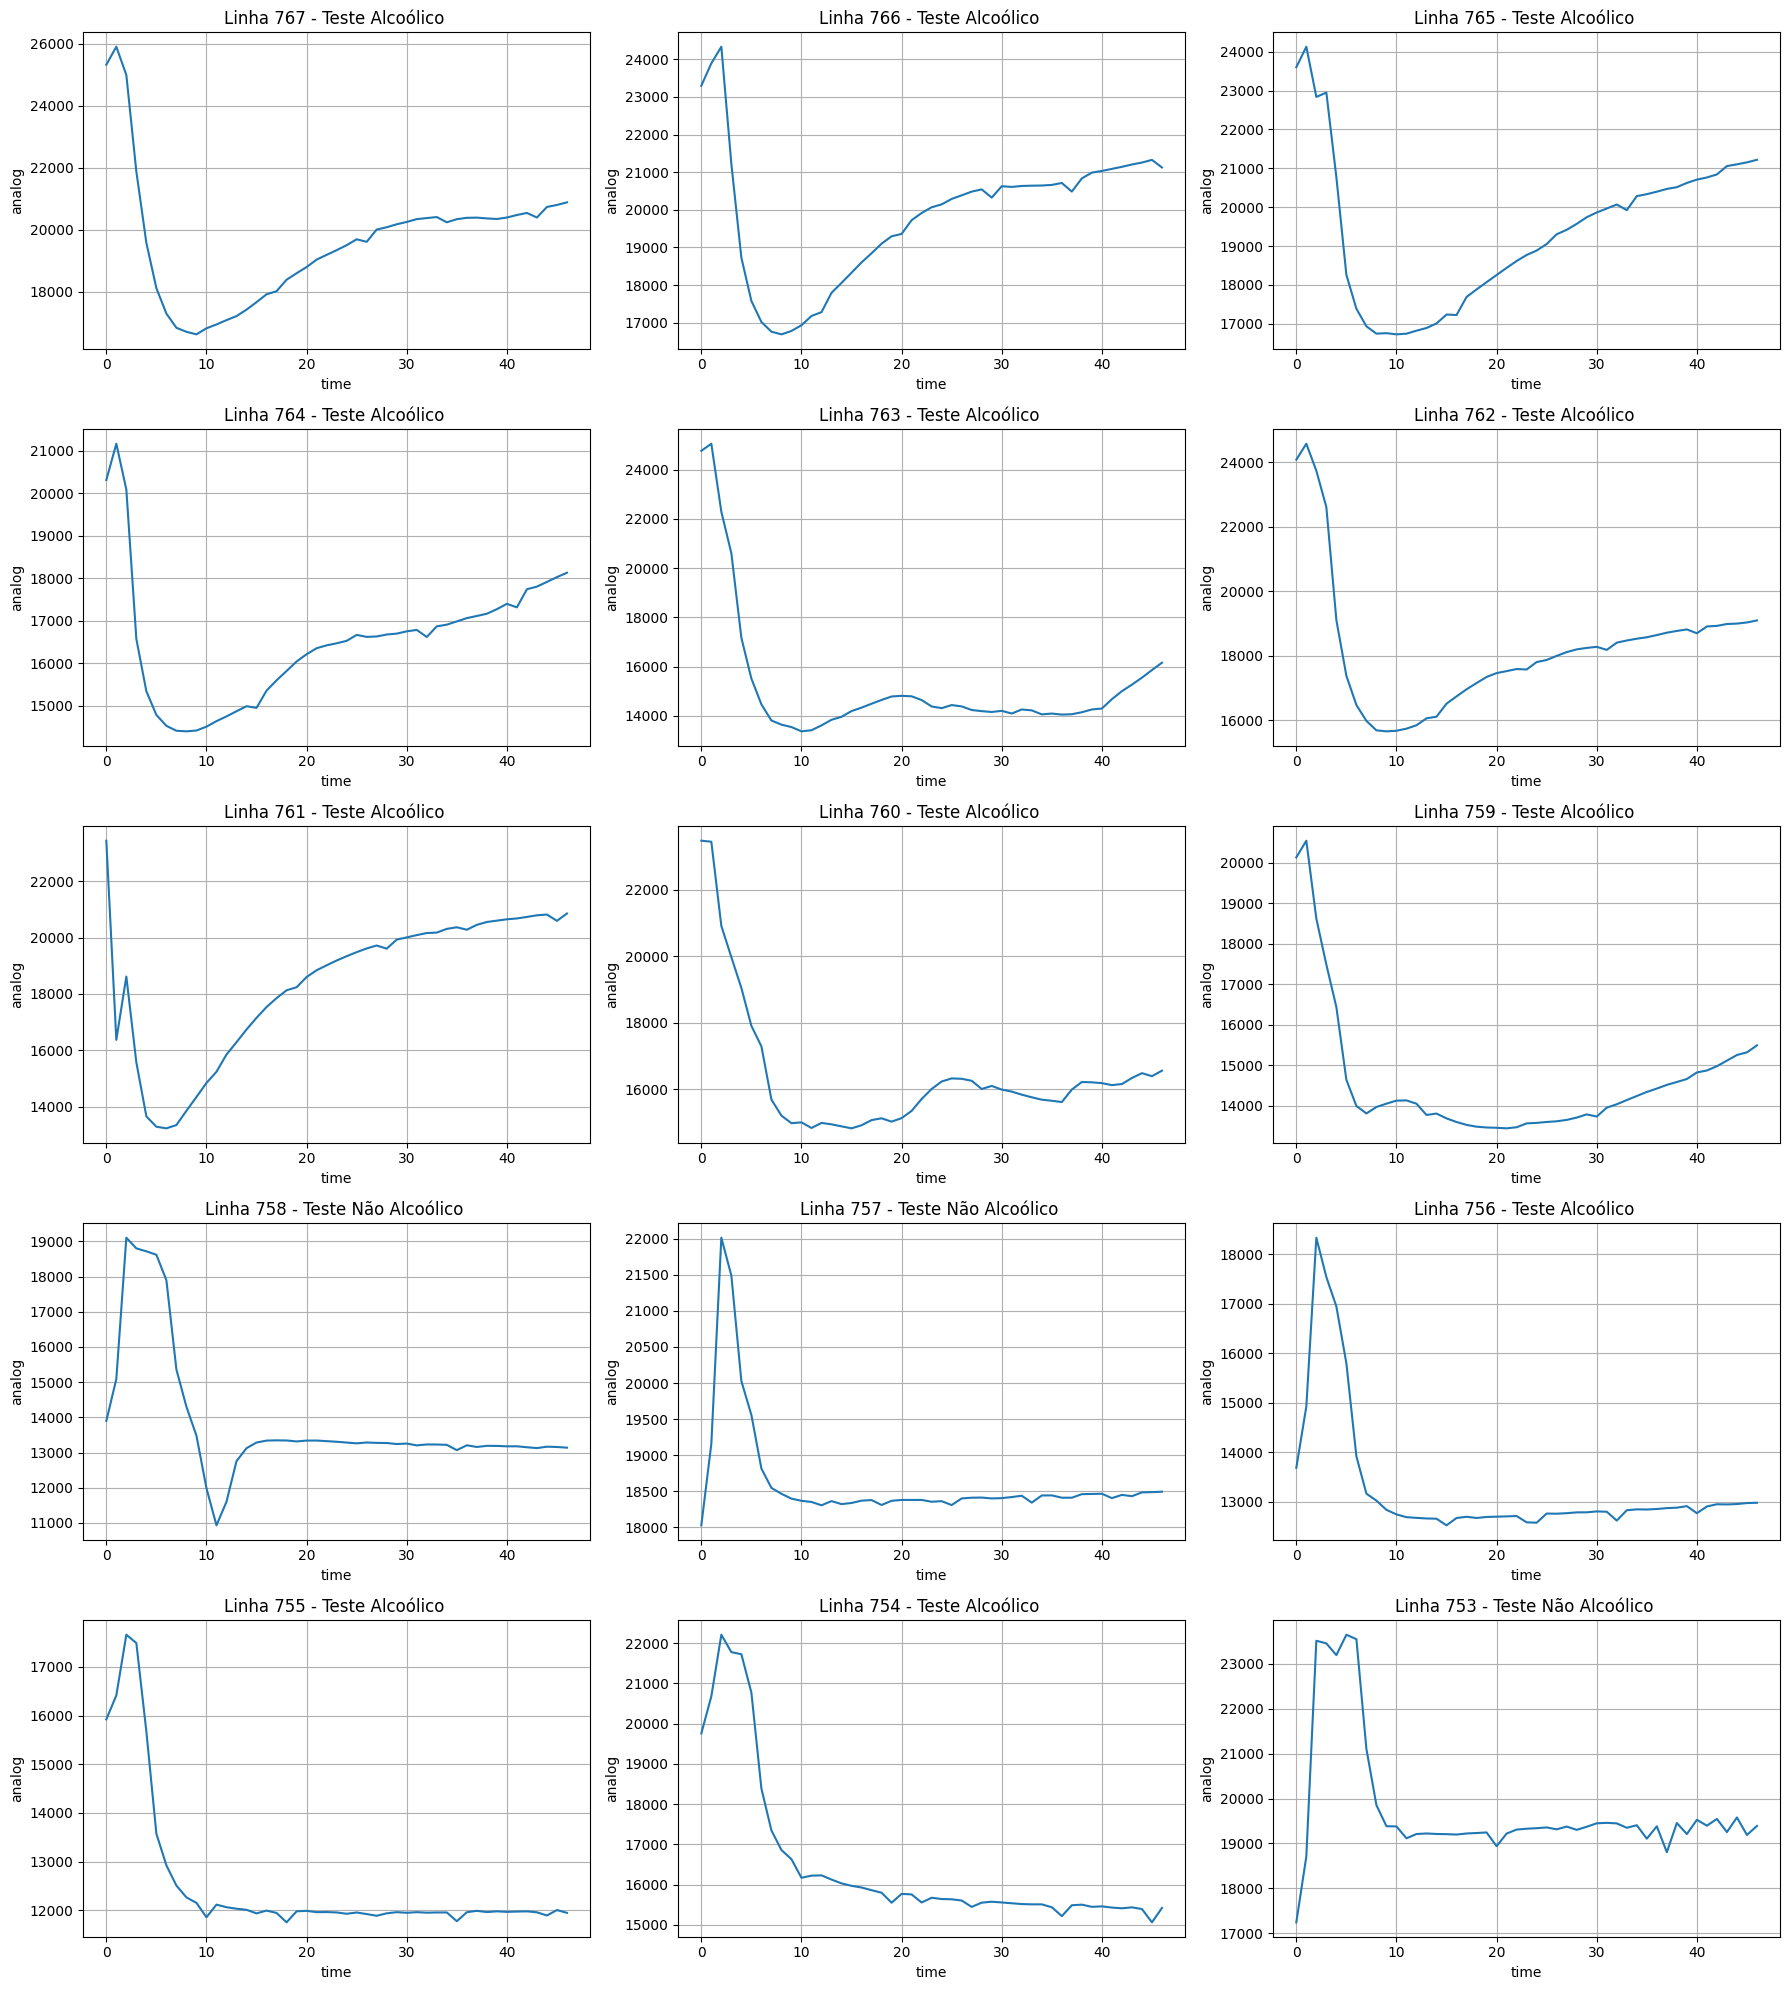

In [75]:
import math

def plotTables(df, limit=None):
    count   = len(df) if limit is None else min(limit, len(df))
    numCols = 3 if count >= 3 else count
    numRows = math.ceil(count / numCols)
    plt.figure(figsize=(6*numCols, 4*numRows))
    
    for idx, (i, row) in enumerate(df.iterrows()):
        if idx >= count:
            break
        
        plt.subplot(numRows, numCols, idx+1)
        plt.plot(row.data)
        title  = f'Linha {i+2} - Teste {"Alcoólico" if row["alcohol"] else "Não Alcoólico"}'
        status = f''
        
        plt.title(f'{title} {status}')
        plt.grid(), plt.xlabel('time'), plt.ylabel('analog')
    
    plt.tight_layout()
    plt.show()


plotTables(df.iloc[::-1], limit=15)

# ENGENHARIA DE ATRIBUTOSW

In [76]:
from scipy.stats import skew, kurtosis

In [77]:
df['mean']   = [np.mean(data) for data in df.data]
df['std']    = [np.std(data, ddof=1) for data in df.data]
df['min']    = [np.min(data) for data in df.data]
df['max']    = [np.max(data) for data in df.data]
df['first']  = [data[0] for data in df.data]
df['last']   = [data[-1] for data in df.data]
df['median'] = [np.median(data) for data in df.data]


df['auc']    = [np.sum(data) for data in df.data]
df['decayed'] = [(data[0] - np.min(data) > 1500) for data in df.data]
df['auc_recover'] = [np.sum(data[10:]) for data in df.data]

#(implementar) Tempo para o sinal cair para 50% do pico.

df['amplitude'] = [np.max(data) - np.min(data) for data in df.data]
df['rise']      = [data[0]  - np.max(data) for data in df.data]
df['decay']     = [data[0] - np.min(data) for data in df.data]
df['reldecay']  = [(np.max(data) - np.min(data))/np.mean(data) for data in df.data]
df['residual']  = [data[-1] - data[0] for data in df.data]

df['mean_diff']   = [np.mean(np.gradient(data)) for data in df.data]
df['std_diff']    = [np.std(np.gradient(data), ddof=1) for data in df.data]
df['min_diff']    = [np.min(np.gradient(data)) for data in df.data]
df['max_diff']    = [np.max(np.gradient(data)) for data in df.data]
df['first_diff']  = [np.gradient(data)[0] for data in df.data]
df['last_diff']   = [np.gradient(data)[-1] for data in df.data]
df['median_diff'] = [np.median(np.gradient(data)) for data in df.data]
df['auc_diff']    = [np.sum(np.gradient(data)) for data in df.data]
df['auc_recover_diff'] = [np.sum(np.gradient(data[10:])) for data in df.data]


df['auc_norm']   = [np.sum((data-np.mean(data))/np.std(data)) for data in df.data]
df['time_peak'] = [np.argmax(data) for data in df.data]
df['time_low']  = [np.argmin(data) for data in df.data]
df['skew']      = [skew(data) for data in df.data]   # Assimetria
df['kurt']      = [kurtosis(data) for data in df.data] # Curtose
df['slope_ratio'] = df['min_diff'] / (df['max'] - df['min'])

df.head(3)

,data,alcohol,mean,std,min,max,first,last,median,auc,decayed,auc_recover,amplitude,rise,decay,reldecay,residual,mean_diff,std_diff,min_diff,max_diff,first_diff,last_diff,median_diff,auc_diff,auc_recover_diff,auc_norm,time_peak,time_low,skew,kurt,slope_ratio
0,"[23534, 24013, 26216, 26172, 26108, 25037, 240...",False,23557.723404,750.506487,23250,26216,23534,23275,23281.0,1107213,False,861558,2966,-2682,284,0.125904,-259,-0.382979,334.276298,-1006.5,1341.0,479.0,3.0,-2.0,-18.0,-101.0,-1.125766e-13,2,34,2.908454,7.086787,-0.339346
1,"[23797, 24164, 26134, 26143, 26142, 26120, 253...",False,23877.446809,756.473851,23536,26143,23797,23596,23585.0,1122240,False,872380,2607,-2346,261,0.109183,-201,-0.361702,297.088420,-858.5,1168.5,367.0,1.0,0.5,-17.0,-82.5,3.719247e-15,3,37,2.459624,4.403464,-0.329306
2,"[23899, 24905, 26249, 26359, 26335, 26225, 254...",False,24055.574468,757.619921,23695,26359,23899,23801,23765.0,1130612,False,878804,2664,-2460,204,0.110744,-98,8.680851,312.737500,-862.0,1175.0,1006.0,6.0,2.0,408.0,-20.0,3.891332e-14,3,32,2.384043,4.089210,-0.323574


# CORRELAÇÕES

- **Pearson:** $\Rightarrow$ Melhor quando a relação é linear e as variáveis são numéricas contínuas com distribuição razoavelmente normal, útil para dados em escala intervalar ou de razão, exemplo, altura e peso de pessoas na mesma faixa etária.

- **Spearman:** Ideal para relações monotônicas que podem ser não lineares e para dados com outliers ou escalas ordinais, funciona com rankings e Likert, exemplo, posição em um ranking de vendas versus satisfação do cliente em escala de 1 a 5.

- **Kendall:** Preferível em amostras pequenas ou com muitos empates em dados ordinais, mais robusta e interpretável como concordância de pares, exemplo, comparar duas ordens de preferência dadas por juízes.

{'decayed': 0.8097723628941527,
 'decay': 0.6826340042229483,
 'min': -0.6401886647756938,
 'auc_recover': -0.624743740113629,
 'auc': -0.6235285730553587,
 'mean': -0.6235285730553572,
 'median': -0.6183018033096268,
 'mean_diff': -0.6086608709243235,
 'auc_diff': -0.608660870924323,
 'residual': -0.6085218352603394,
 'last': -0.5966876032835893,
 'reldecay': 0.5018919237008591,
 'amplitude': 0.4869982655380124,
 'std': 0.4792129865964591,
 'max': -0.4438464386330783,
 'min_diff': -0.418130300449575,
 'rise': 0.4107106475760477,
 'max_diff': -0.3648769299098545,
 'first_diff': -0.30862628467977166}

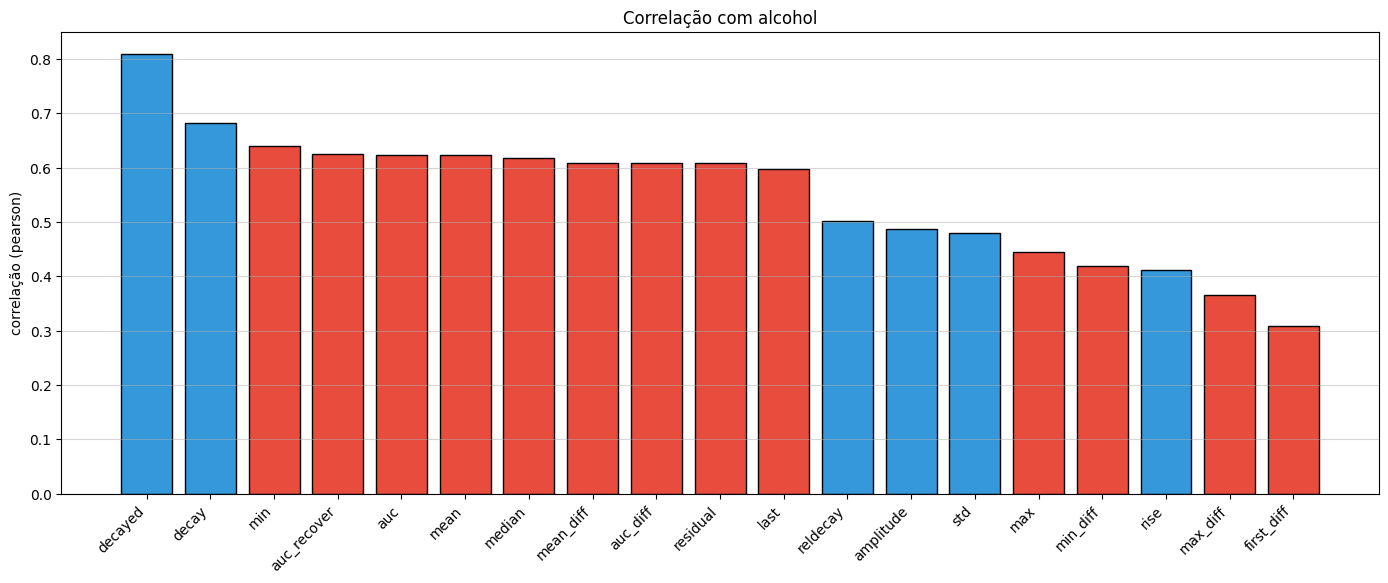

In [78]:
class Correlations:
    def __init__(self, df, tresh=0.5, method='pearson'):
        self.df = df.copy()
        self.tresh  = tresh
        self.method = method
        self.matrix = self.df.corr(method=self.method)

    def get(self, target_col):
        if target_col not in self.matrix.columns:
            return {}
            
        corr = self.matrix[target_col].drop(target_col)
        keep = corr[abs(corr) >= self.tresh].sort_values(key=abs, ascending=False)        
        return {ref: corr for ref, corr in keep.items()}
    
    def all(self):
        result = {}
        for col in self.matrix.columns:
            info = self.get(col)
            if len(info) > 0:
                result[col] = info
        return result
    
    def plot(self, target_col, show_max=None):
        corrs = self.get(target_col)
        
        if not corrs: 
            return
        
        original_values = self.matrix.loc[list(corrs.keys()), target_col]
        labels = [str(label)[:20] for label in corrs.keys()]
        values = [abs(v) for v in corrs.values()] # Altura da barra = Importância
        
        colors = ['#3498db' if original_values[label] > 0 else '#e74c3c' for label in corrs.keys()]
        plt.bar(labels[:show_max], values[:show_max], color=colors[:show_max], edgecolor='black')
        plt.title(f'Correlação com {target_col}')
        plt.ylabel(f'correlação ({self.method})'); plt.grid(axis='y', alpha=0.5)

        if len(corrs) >= 4:
            plt.xticks(rotation=45, ha='right')
    
    def heatmap(self, target_col, n=None):
        if target_col not in self.matrix.columns: 
            return

        top_cols = self.matrix[target_col].abs().sort_values(ascending=False).drop(target_col)
        
        if n: 
            top_cols = top_cols.head(n)
        
        cols_to_plot  = [target_col] + top_cols.index.tolist()
        matrix_subset = self.matrix.loc[cols_to_plot, cols_to_plot]

        plt.figure(figsize=(17, 10))
        sns.heatmap(matrix_subset.abs(), annot=True, fmt=".2f", cmap='Blues', vmin=0, vmax=1)
        plt.title(f'Mapa de Calor (Top {n})')
        plt.xticks(rotation=45, ha='right')
        plt.show()


df_corr = df.drop(columns=['data'])
corr    = Correlations(df_corr, tresh=0.30)
plt.figure(figsize=(17, 6))
corr.plot(TARGET, show_max=None)
corr.get(TARGET)

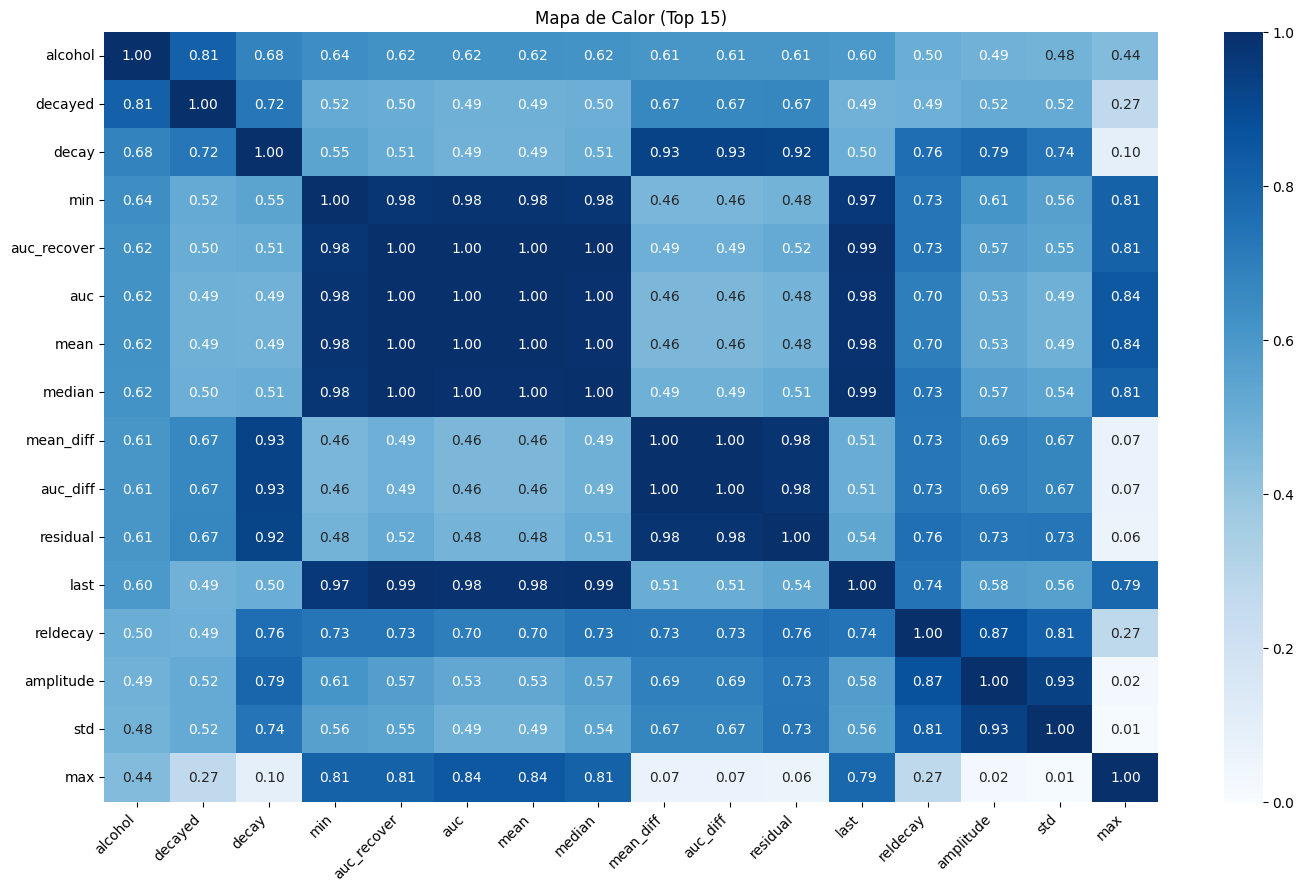

In [79]:
corr.heatmap(TARGET, n=15)

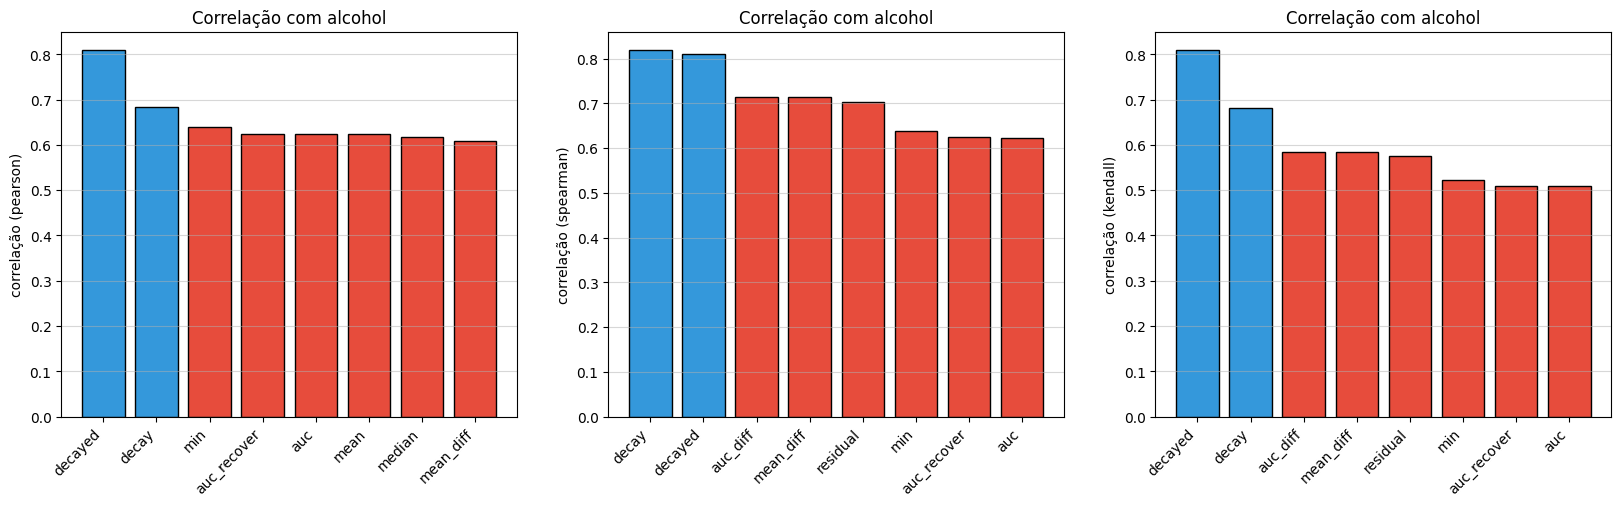

In [80]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
Correlations(df_corr, tresh=0, method='pearson').plot(TARGET, show_max=8)

plt.subplot(1, 3, 2)
Correlations(df_corr, tresh=0, method='spearman').plot(TARGET, show_max=8)

plt.subplot(1, 3, 3)
Correlations(df_corr, tresh=0, method='kendall').plot(TARGET, show_max=8)

# SELEÇÃO

In [81]:
CORR_TRESH = 0.10
best_corr  = list(Correlations(df_corr, tresh=CORR_TRESH).get(TARGET))
best_corr

['decayed',
 'decay',
 'min',
 'auc_recover',
 'auc',
 'mean',
 'median',
 'mean_diff',
 'auc_diff',
 'residual',
 'last',
 'reldecay',
 'amplitude',
 'std',
 'max',
 'min_diff',
 'rise',
 'max_diff',
 'first_diff',
 'first',
 'slope_ratio',
 'std_diff',
 'time_peak',
 'time_low',
 'median_diff']

In [82]:
df = df[best_corr + [TARGET, 'data']]
df

,decayed,decay,min,auc_recover,auc,mean,median,mean_diff,auc_diff,residual,last,reldecay,amplitude,std,max,min_diff,rise,max_diff,first_diff,first,slope_ratio,std_diff,time_peak,time_low,median_diff,alcohol,data
0,False,284,23250,861558,1107213,23557.723404,23281.0,-0.382979,-18.0,-259,23275,0.125904,2966,750.506487,26216,-1006.5,-2682,1341.0,479.0,23534,-0.339346,334.276298,2,34,-2.0,False,"[23534, 24013, 26216, 26172, 26108, 25037, 240..."
1,False,261,23536,872380,1122240,23877.446809,23585.0,-0.361702,-17.0,-201,23596,0.109183,2607,756.473851,26143,-858.5,-2346,1168.5,367.0,23797,-0.329306,297.088420,3,37,0.5,False,"[23797, 24164, 26134, 26143, 26142, 26120, 253..."
2,False,204,23695,878804,1130612,24055.574468,23765.0,8.680851,408.0,-98,23801,0.110744,2664,757.619921,26359,-862.0,-2460,1175.0,1006.0,23899,-0.323574,312.737500,3,32,2.0,False,"[23899, 24905, 26249, 26359, 26335, 26225, 254..."
3,False,444,23523,874099,1131125,24066.489362,23586.0,-4.787234,-225.0,-414,23553,0.114765,2762,951.326599,26285,-796.0,-2318,1159.0,417.0,23967,-0.288197,286.202777,2,29,-3.5,False,"[23967, 24384, 26285, 26237, 26228, 26188, 261..."
4,False,33,23826,892564,1141993,24297.723404,23938.0,6.361702,299.0,84,23943,0.100544,2443,723.535964,26269,-849.5,-2410,1205.0,428.0,23859,-0.347728,397.356656,2,25,2.0,False,"[23859, 24287, 26269, 26188, 26115, 25477, 245..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,True,11393,13375,533428,714328,15198.468085,14317.0,-176.829787,-8311.0,-8605,16163,0.768630,11682,2616.573505,25057,-2559.0,-289,352.5,289.0,24768,-0.219055,689.233240,1,10,28.0,True,"[24768, 25057, 22293, 20608, 17175, 15517, 144..."
762,True,5913,14395,610531,776514,16521.574468,16617.0,-36.212766,-1702.0,-2181,18127,0.409586,6767,1513.866124,21162,-2373.0,-854,854.0,854.0,20308,-0.350672,535.349416,1,8,64.0,True,"[20308, 21162, 20084, 16568, 15338, 14781, 145..."
763,True,6870,16731,711705,912089,19406.148936,19572.0,-44.382979,-2086.0,-2382,21219,0.381168,7397,1923.041137,24128,-2344.0,-527,527.0,527.0,23601,-0.316885,497.244639,1,10,97.0,True,"[23601, 24128, 22837, 22948, 20774, 18260, 173..."
764,True,6607,16689,737606,933893,19870.063830,20383.0,-42.031915,-1975.5,-2172,21124,0.384699,7644,1807.831663,24333,-2803.5,-1037,594.0,594.0,23296,-0.366758,580.054105,2,8,79.0,True,"[23296, 23890, 24333, 21220, 18726, 17577, 170..."


# SALVANDO O MODELO

In [83]:
df.to_csv('../Dataset/model.csv', index=None)